## Cohort Graph and Analysis: 
- Using the dataset you have to build a cohort analysis which shows the retention rate of the business Month on Month.

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading the dataset
data = pd.read_csv("Data Set 2.csv")

data.shape

(533327, 7)

In [3]:
data.head()

,id,customer_id,location_id,channel,amount,bill_no,created_on
0,42877344,60,192,uber,1039,GGN001-24323,24-06-2018 00:00
1,35625005,134,535,takeaway,1029,DEL007-1522,14-01-2018 19:21
2,44397299,166,347,uber,355,DEL005-29173,13-09-2018 13:40
3,44405460,166,347,uber,371,DEL005-29180,13-09-2018 14:33
4,44717004,166,347,uber,371,DEL005-29603,16-09-2018 12:40


In [4]:
# checking number of null values in data
data.isnull().sum()

id             0
customer_id    0
location_id    0
channel        0
amount         0
bill_no        0
created_on     0
dtype: int64

``NOTE:`` There are no null values. 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533327 entries, 0 to 533326
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           533327 non-null  int64 
 1   customer_id  533327 non-null  int64 
 2   location_id  533327 non-null  int64 
 3   channel      533327 non-null  object
 4   amount       533327 non-null  int64 
 5   bill_no      533327 non-null  object
 6   created_on   533327 non-null  object
dtypes: int64(4), object(3)
memory usage: 28.5+ MB


In [6]:
# converting column 'created_on' to datetime object
data['created_on'] = pd.to_datetime(data['created_on'])

In [7]:
data.head()

,id,customer_id,location_id,channel,amount,bill_no,created_on
0,42877344,60,192,uber,1039,GGN001-24323,2018-06-24 00:00:00
1,35625005,134,535,takeaway,1029,DEL007-1522,2018-01-14 19:21:00
2,44397299,166,347,uber,355,DEL005-29173,2018-09-13 13:40:00
3,44405460,166,347,uber,371,DEL005-29180,2018-09-13 14:33:00
4,44717004,166,347,uber,371,DEL005-29603,2018-09-16 12:40:00


In [8]:
data.describe()

,id,customer_id,location_id,amount
count,5.333270e+05,5.333270e+05,533327.000000,533327.000000
mean,4.794955e+07,4.832702e+06,1500.813602,551.399865
std,7.987404e+06,3.424067e+06,1914.140397,1388.179206
min,3.561932e+07,6.000000e+01,192.000000,0.000000
25%,4.170082e+07,1.681087e+06,194.000000,304.000000
50%,4.692534e+07,5.880546e+06,272.000000,372.000000
75%,5.031443e+07,7.501177e+06,4003.000000,584.000000
max,6.392059e+07,1.165519e+07,5099.000000,604827.000000


In [9]:
def get_month(x):
    return dt.datetime(x.year, x.month, 1)

In [10]:
data['Inv_Month'] = data['created_on'].apply(get_month)

In [11]:
data.head()

,id,customer_id,location_id,channel,amount,bill_no,created_on,Inv_Month
0,42877344,60,192,uber,1039,GGN001-24323,2018-06-24 00:00:00,2018-06-01
1,35625005,134,535,takeaway,1029,DEL007-1522,2018-01-14 19:21:00,2018-01-01
2,44397299,166,347,uber,355,DEL005-29173,2018-09-13 13:40:00,2018-09-01
3,44405460,166,347,uber,371,DEL005-29180,2018-09-13 14:33:00,2018-09-01
4,44717004,166,347,uber,371,DEL005-29603,2018-09-16 12:40:00,2018-09-01


### Cohort Analysis

In [12]:
grouping = data.groupby('customer_id')['Inv_Month']

In [13]:
data['CohortMonth'] = grouping.transform('min')

In [14]:
data.head()

,id,customer_id,location_id,channel,amount,bill_no,created_on,Inv_Month,CohortMonth
0,42877344,60,192,uber,1039,GGN001-24323,2018-06-24 00:00:00,2018-06-01,2018-06-01
1,35625005,134,535,takeaway,1029,DEL007-1522,2018-01-14 19:21:00,2018-01-01,2018-01-01
2,44397299,166,347,uber,355,DEL005-29173,2018-09-13 13:40:00,2018-09-01,2018-09-01
3,44405460,166,347,uber,371,DEL005-29180,2018-09-13 14:33:00,2018-09-01,2018-09-01
4,44717004,166,347,uber,371,DEL005-29603,2018-09-16 12:40:00,2018-09-01,2018-09-01


In [15]:
def get_date(df, col):
    year = df[col].dt.year
    month = df[col].dt.month
    day = df[col].dt.day
    
    return year, month, day

In [16]:
InvYear, InvMonth, _ = get_date(data,'Inv_Month')

In [17]:
cohort_year, cohort_month, _ = get_date(data, 'CohortMonth')

In [18]:
year_diff = InvYear - cohort_year

In [19]:
year_diff

0         0
1         0
2         0
3         0
4         0
         ..
533322    0
533323    0
533324    0
533325    0
533326    0
Length: 533327, dtype: int64

In [20]:
month_diff = InvMonth - cohort_month
month_diff

0         0
1         0
2         0
3         0
4         0
         ..
533322    0
533323    0
533324    0
533325    0
533326    0
Length: 533327, dtype: int64

In [21]:
data['CohortIndex'] = year_diff * 12 + month_diff + 1

<AxesSubplot:xlabel='CohortIndex', ylabel='count'>

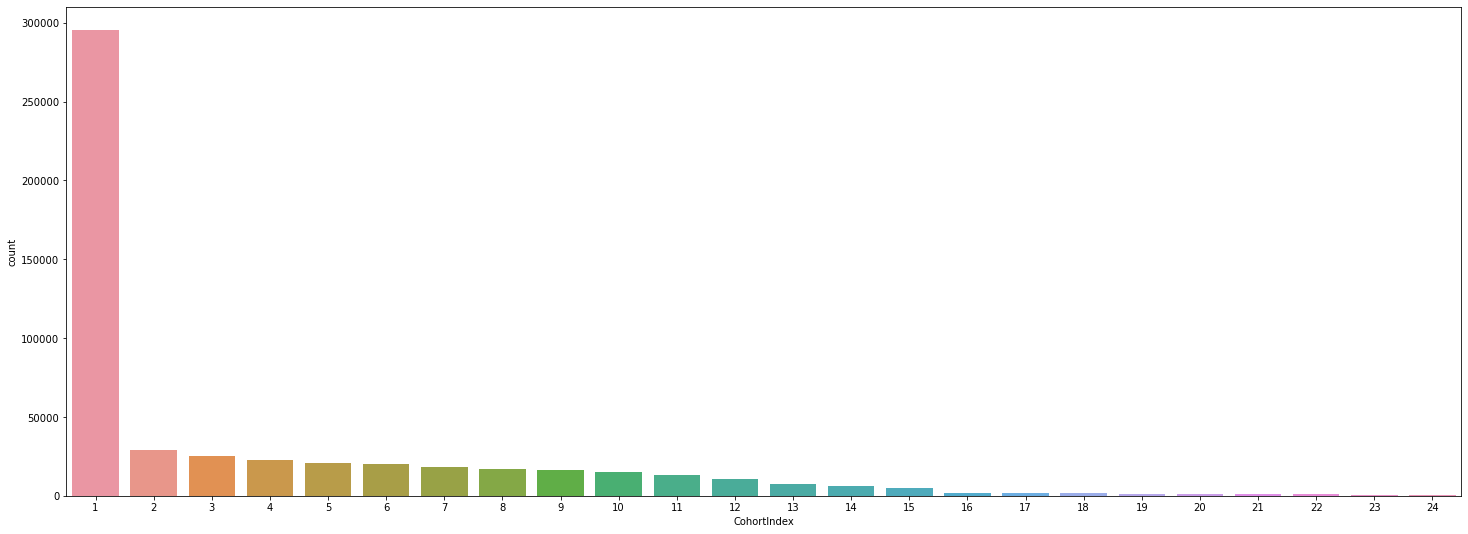

In [22]:
plt.figure(figsize=(25,9))
sns.countplot(x='CohortIndex', data=data)

In [23]:
data.head()

,id,customer_id,location_id,channel,amount,bill_no,created_on,Inv_Month,CohortMonth,CohortIndex
0,42877344,60,192,uber,1039,GGN001-24323,2018-06-24 00:00:00,2018-06-01,2018-06-01,1
1,35625005,134,535,takeaway,1029,DEL007-1522,2018-01-14 19:21:00,2018-01-01,2018-01-01,1
2,44397299,166,347,uber,355,DEL005-29173,2018-09-13 13:40:00,2018-09-01,2018-09-01,1
3,44405460,166,347,uber,371,DEL005-29180,2018-09-13 14:33:00,2018-09-01,2018-09-01,1
4,44717004,166,347,uber,371,DEL005-29603,2018-09-16 12:40:00,2018-09-01,2018-09-01,1


In [24]:
cohort_data = data.groupby(['CohortMonth','CohortIndex'])['customer_id'].apply(pd.Series.nunique).reset_index()


In [25]:
cohort_data

,CohortMonth,CohortIndex,customer_id
0,2018-01-01,1,22314
1,2018-01-01,2,4079
2,2018-01-01,3,3744
3,2018-01-01,4,3731
4,2018-01-01,5,3339
...,...,...,...
295,2019-10-01,2,18
296,2019-10-01,3,23
297,2019-11-01,1,1257
298,2019-11-01,2,14


In [26]:
cohort_count = cohort_data.pivot_table(index='CohortMonth',columns='CohortIndex',values='customer_id')

In [27]:
cohort_count

CohortIndex,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
CohortMonth,,,,,,,,,,,,,,,,,,,,,
2018-01-01,22314.0,4079.0,3744.0,3731.0,3339.0,3691.0,3573.0,3311.0,3502.0,3355.0,...,2143.0,420.0,530.0,493.0,405.0,501.0,494.0,502.0,356.0,351.0
2018-02-01,17509.0,2014.0,2016.0,1901.0,1934.0,1957.0,1759.0,1994.0,1944.0,2163.0,...,218.0,291.0,283.0,252.0,303.0,259.0,296.0,195.0,202.0,NaN
2018-03-01,13437.0,1481.0,1307.0,1329.0,1274.0,1182.0,1258.0,1247.0,1393.0,1158.0,...,187.0,155.0,161.0,189.0,179.0,177.0,113.0,124.0,NaN,NaN
2018-04-01,13317.0,1139.0,1127.0,1111.0,960.0,1054.0,1024.0,1134.0,1030.0,589.0,...,138.0,134.0,153.0,127.0,131.0,103.0,98.0,NaN,NaN,NaN
2018-05-01,13483.0,1084.0,1038.0,890.0,962.0,950.0,1025.0,930.0,560.0,572.0,...,131.0,143.0,122.0,122.0,90.0,80.0,NaN,NaN,NaN,NaN
2018-06-01,15627.0,1118.0,922.0,1001.0,997.0,1117.0,960.0,544.0,615.0,731.0,...,128.0,145.0,141.0,105.0,107.0,NaN,NaN,NaN,NaN,NaN
2018-07-01,15920.0,881.0,980.0,931.0,1059.0,875.0,533.0,592.0,729.0,121.0,...,134.0,132.0,103.0,95.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-01,12597.0,756.0,679.0,750.0,685.0,420.0,498.0,621.0,82.0,121.0,...,115.0,72.0,69.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-01,16851.0,1087.0,1174.0,896.0,499.0,607.0,748.0,102.0,126.0,142.0,...,83.0,87.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


``Retention rate:"``The percentage of active customers compared to the total number of customers after a specific time interval is called retention rate.

In [28]:
cohort_sizes = cohort_count.iloc[:,0]
retention = cohort_count.divide(cohort_sizes, axis=0)

retention.round(3)

CohortIndex,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
CohortMonth,,,,,,,,,,,,,,,,,,,,,
2018-01-01,1.0,0.183,0.168,0.167,0.150,0.165,0.160,0.148,0.157,0.150,...,0.096,0.019,0.024,0.022,0.018,0.022,0.022,0.022,0.016,0.016
2018-02-01,1.0,0.115,0.115,0.109,0.110,0.112,0.100,0.114,0.111,0.124,...,0.012,0.017,0.016,0.014,0.017,0.015,0.017,0.011,0.012,NaN
2018-03-01,1.0,0.110,0.097,0.099,0.095,0.088,0.094,0.093,0.104,0.086,...,0.014,0.012,0.012,0.014,0.013,0.013,0.008,0.009,NaN,NaN
2018-04-01,1.0,0.086,0.085,0.083,0.072,0.079,0.077,0.085,0.077,0.044,...,0.010,0.010,0.011,0.010,0.010,0.008,0.007,NaN,NaN,NaN
2018-05-01,1.0,0.080,0.077,0.066,0.071,0.070,0.076,0.069,0.042,0.042,...,0.010,0.011,0.009,0.009,0.007,0.006,NaN,NaN,NaN,NaN
2018-06-01,1.0,0.072,0.059,0.064,0.064,0.071,0.061,0.035,0.039,0.047,...,0.008,0.009,0.009,0.007,0.007,NaN,NaN,NaN,NaN,NaN
2018-07-01,1.0,0.055,0.062,0.058,0.067,0.055,0.033,0.037,0.046,0.008,...,0.008,0.008,0.006,0.006,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-01,1.0,0.060,0.054,0.060,0.054,0.033,0.040,0.049,0.007,0.010,...,0.009,0.006,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-01,1.0,0.065,0.070,0.053,0.030,0.036,0.044,0.006,0.007,0.008,...,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
import plotly.express as px

fig = px.line(retention.T)
fig.show()

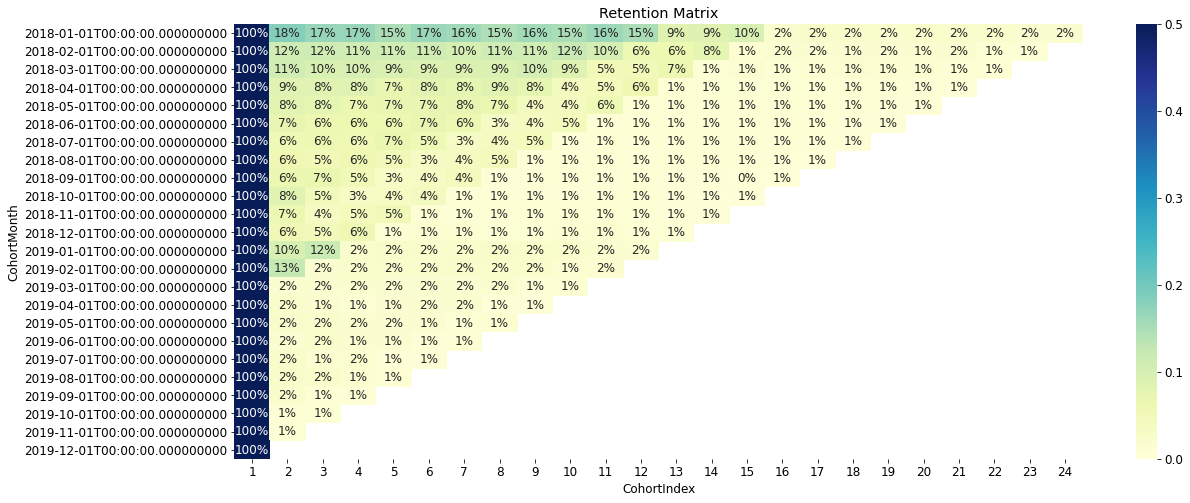

In [53]:
plt.rcParams['figure.figsize'] = (19,8)
sns.heatmap(data=retention, 
            annot=True,
            fmt='.0%',
            vmin=0.0,
            vmax=0.5,cmap="YlGnBu")
plt.title('Retention Matrix')
plt.show()

The value at CohortMonth **2018-01-01**, CohortIndex **2 is 18.3** and represents **18% of customers were retained in the 2nd month**.